In [19]:
import numpy as np
import pandas as pd
import shap
import joblib
import os
from sklearn.model_selection import LeaveOneGroupOut
import shap
import pandas as pd

def get_summary_plot(conf_name):
    print("SHAP "+conf_name)
    loaded_model = joblib.load('./results/models/RF/'+conf_name+'.pkl')
    df = pd.read_csv("./Data/processed/"+conf_name+".csv", index_col = 0)
    X = df.drop(['target'], axis = 1)
    X = X.rename(columns=lambda s: s.split("/")[-1])
    y = df.iloc[:,-1]

    logo = LeaveOneGroupOut()
    groups = X['instance']
    logo.get_n_splits(X, y, groups)
    dt = []
    for train_index, test_index in logo.split(X, y, groups):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        X_train_removed = X_train.drop(['instance', 'function'], axis=1)
        for instance in np.unique(np.array(X_train['instance'])):
            loaded_model = loaded_model.fit(X_train_removed, y_train)
            explainer = shap.TreeExplainer(loaded_model)
            data = X_train[X_train['instance']==instance]
            func = np.array(data['function']).reshape(24,1)
            ins = np.array(data['instance']).reshape(24,1)
            data = data.drop(['instance', 'function'], axis=1)
            shap_values = np.concatenate((func, ins, explainer.shap_values(data)), axis=1)
            dt.extend(shap_values)


    df_dt = pd.DataFrame(dt)


    final_shap = []
    for f in [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 1, 20, 21, 22, 23, 24, 2, 3, 4, 5, 6, 7, 8, 9]:
        for i in range(1, 6):
            d = df_dt[(df_dt[0]==f) & (df_dt[1]==i)]
            d = d.drop([d.columns[0], d.columns[1]], axis=1)
            avg = np.average(d, axis = 0)
            final_shap.append(avg)
    X_removed= X.drop(['instance', 'function'], axis=1)
    print(np.array(final_shap).shape)
    print(X_removed.shape)
    shap.summary_plot(np.array(final_shap), features = X_removed, max_display=10)

SHAP dim_5_budget_2000_conf_270
(120, 46)
(120, 46)


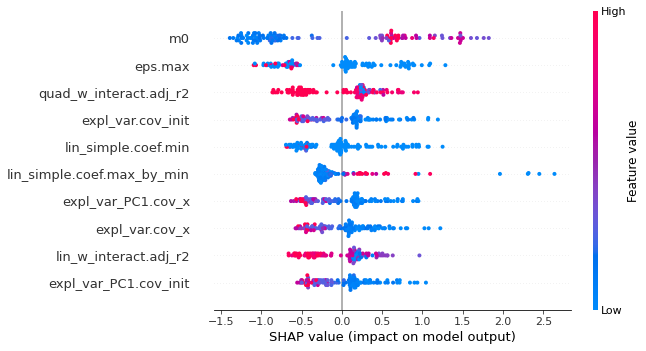

SHAP dim_5_budget_2000_conf_1080
(120, 46)
(120, 46)


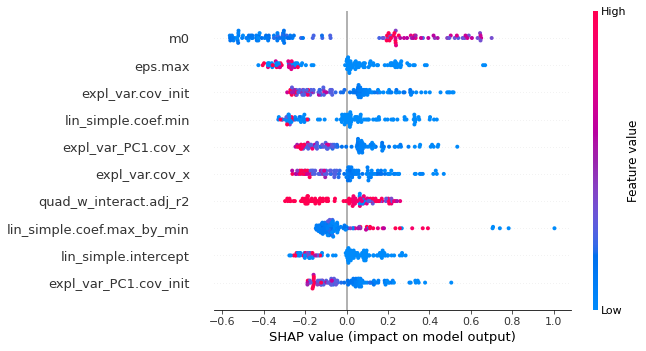

In [20]:
get_summary_plot("dim_5_budget_2000_conf_270")
get_summary_plot("dim_5_budget_2000_conf_1080")